In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [34]:
path = '/Users/fbickfordsmith/Google Drive/Project/attention/'
path_baseline = path+'results/baseline_classwise_acc.csv'
# path_trained = path+'results/semcontexts_trained_metrics.csv'
path_contexts = path+'contexts/semcontexts_wnids.csv'
path_synsets = path+'metadata/synsets.txt'
path_training = path+'training/'
path_contexts = path+'contexts/'

In [21]:
wnids = [line.rstrip('\n') for line in open(path_synsets)]
wnid2ind = {wnid:ind for ind, wnid in enumerate(wnids)}

In [22]:
with open(path_contexts) as f:
    contexts = [row for row in csv.reader(f, delimiter=',')]

In [33]:
df0 = pd.read_csv(path_baseline, index_col=0)

In [24]:
acc0 = []
for c in contexts:
    inds_in = [wnid2ind[w] for w in c]
    inds_out = list(set(range(1000)) - set(inds_in))
    acc0.append([np.mean(df0['accuracy'][inds_in]), np.mean(df0['accuracy'][inds_out])])
acc0 = np.array(acc0)

In [36]:
filenames = [f for f in os.listdir(path_contexts) if 'imagenet' in f]
for f in filenames:
    df = pd.read_csv(path_contexts+f)
    print(f'Found {df.shape[0]} classes in {f}')

Found 35 classes in imagenet_kitchen.csv
Found 129 classes in imagenet_dogs.csv
Found 13 classes in imagenet_cats.csv
Found 57 classes in imagenet_wearable.csv
Found 45 classes in imagenet_landtransport.csv
Found 60 classes in imagenet_birds.csv


### Version 1: no data augmentation

In [25]:
df1 = pd.read_csv(path+'results/semcontexts_trained_metrics_v1.csv', index_col=0) 
df1

,incontext_loss,incontext_acc,incontext_top_k_categorical_accuracy,outofcontext_loss,outofcontext_acc,outofcontext_top_k_categorical_accuracy
0,1.900781,0.547170,0.803656,1.265890,0.689699,0.891219
1,1.160351,0.679888,0.915834,1.440840,0.656232,0.863322
2,1.138718,0.716049,0.929012,1.457666,0.650912,0.861071
3,1.808436,0.577826,0.819068,1.279818,0.684073,0.890861
4,0.986548,0.736156,0.924616,1.482645,0.647739,0.863248
5,0.674625,0.831476,0.942587,1.546980,0.627825,0.859571


Number of epochs: [4, 5, 2, 3, 4, 2]


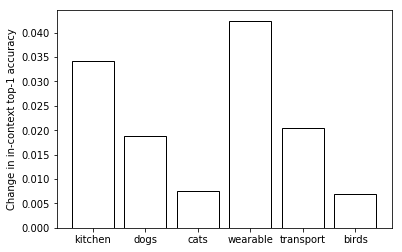

In [39]:
labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
plt.bar(labels, df1['incontext_acc']-acc0[:, 0], color='w', edgecolor='black')
plt.ylabel('Change in in-context top-1 accuracy')
# plt.savefig('semcontexts_acc_change.png', dpi=600)
num_epochs = [len(pd.read_csv(path_training+f'semcontext{i:02}_training_v1.csv', index_col=0)) for i in range(6)]
print('Number of epochs:', num_epochs)
plt.show()

In [27]:
acc0[:, 0]

array([0.51288391, 0.66109994, 0.70847724, 0.53538568, 0.71567764,
       0.82463616])

### Version 2: with data augmentation

In [37]:
df2 = pd.read_csv(path+'results/semcontexts_trained_metrics.csv', index_col=0) 
df2

,incontext_loss,incontext_acc,incontext_top_k_categorical_accuracy,outofcontext_loss,outofcontext_acc,outofcontext_top_k_categorical_accuracy
0,1.982066,0.535377,0.790684,1.269470,0.689376,0.890744
1,1.177483,0.677077,0.914897,1.442579,0.656369,0.865032
2,1.126235,0.722222,0.932099,1.457855,0.652010,0.861337
3,1.650957,0.610329,0.840376,1.317797,0.679359,0.887297
4,1.013840,0.732434,0.924151,1.487528,0.649133,0.862196
5,0.638271,0.839581,0.947653,1.545734,0.630388,0.859394


Number of epochs: [3, 4, 3, 8, 3, 5]


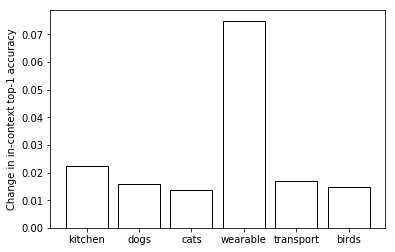

In [40]:
labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
plt.bar(labels, df2['incontext_acc']-acc0[:, 0], color='w', edgecolor='black')
plt.ylabel('Change in in-context top-1 accuracy')
# plt.savefig('semcontexts_acc_change.png', dpi=600)
num_epochs = [len(pd.read_csv(path_training+f'semcontext{i:02}_training.csv', index_col=0)) for i in range(6)]
print('Number of epochs:', num_epochs)
plt.show()